In [1]:
pip install pandas matplotlib seaborn plotly scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:

# import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Đọc dữ liệu
df = pd.read_excel("C:/Users/Sầm Thị Mai Chi/Downloads/OnlineRetail.xlsx", engine='openpyxl')
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167205 entries, 0 to 167204
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     167205 non-null  object        
 1   StockCode     167205 non-null  object        
 2   Description   167205 non-null  object        
 3   Quantity      167205 non-null  int64         
 4   InvoiceDate   167205 non-null  datetime64[ns]
 5   UnitPrice     167205 non-null  float64       
 6   CustomerID    128440 non-null  float64       
 7   Country       167205 non-null  object        
 8   Sales         167205 non-null  float64       
 9   InvoiceMonth  167205 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 12.8+ MB


In [5]:
# Xử lý dữ liệu thiếu
df = df.dropna(subset=["CustomerID"])

# Loại bỏ các giao dịch bị trả hàng (Quantity âm)
df = df[df["Quantity"] > 0]

# Tạo cột tổng giá trị mỗi dòng
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [6]:
# Đọc file và chuyển cột InvoiceDate thành datetime
df = pd.read_excel("C:/Users/Sầm Thị Mai Chi/Downloads/OnlineRetail.xlsx", parse_dates=["InvoiceDate"])

# nhận thấy có những đơn hàng mà số sản phẩm là âm (đây là những đơn hàn đã bị cancel, InvoiceNo có chữ "c")
df[df['Quantity']<0].head()

#loại bỏ những đơn hàng đã bị hủy
df = df[df['Quantity']>0]
print(df[df['UnitPrice']<=0].head())
df = df[df['UnitPrice']>0]


# Tạo điều kiện lọc từ 01/06/2011 đến 31/05/2011
start_date = "2011-06-01"
end_date = "2011-10-06"

filtered_df = df[(df["InvoiceDate"] >= start_date) & (df["InvoiceDate"] <= end_date)]

filtered_df.info()

filtered_df.to_excel("C:/Users/Sầm Thị Mai Chi/Downloads/OnlineRetail.xlsx", index=False)


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Sales, InvoiceMonth]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167205 entries, 0 to 167204
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     167205 non-null  object        
 1   StockCode     167205 non-null  object        
 2   Description   167205 non-null  object        
 3   Quantity      167205 non-null  int64         
 4   InvoiceDate   167205 non-null  datetime64[ns]
 5   UnitPrice     167205 non-null  float64       
 6   CustomerID    128440 non-null  float64       
 7   Country       167205 non-null  object        
 8   Sales         167205 non-null  float64       
 9   InvoiceMonth  167205 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 12.8+ MB


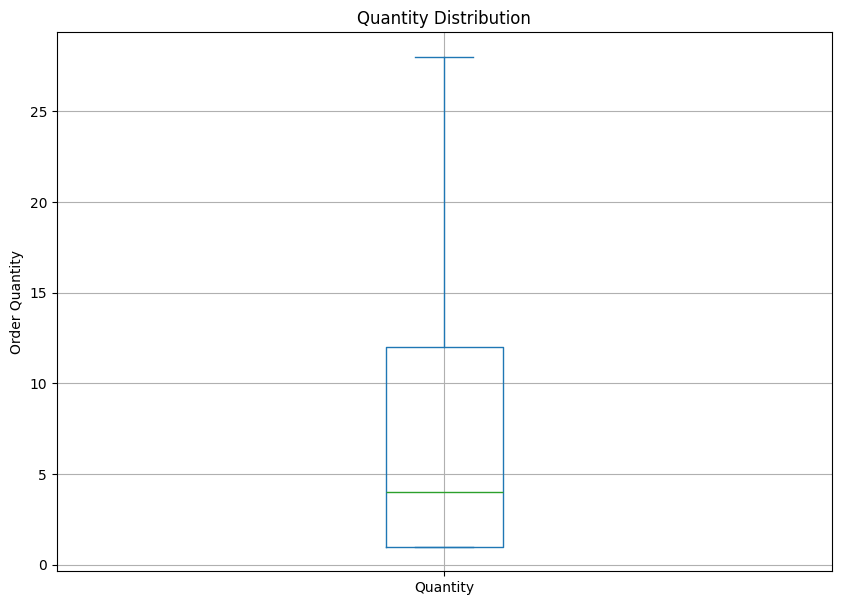

In [7]:
# vẽ biểu đồ boxplot để quan sát cột 
ax = df['Quantity'].plot.box(showfliers=False,
                             grid=True,
                             figsize=(10, 7)) 
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [8]:
# tính toán số đơn trong mỗi tháng
monthly_orders_df = filtered_df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

C:\Users\Sầm Thị Mai Chi\AppData\Local\Temp\ipykernel_11944\69190216.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = filtered_df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


InvoiceDate
2011-06-30    1533
2011-07-31    1475
2011-08-31    1361
2011-09-30    1837
2011-10-31     280
Freq: ME, Name: InvoiceNo, dtype: int64

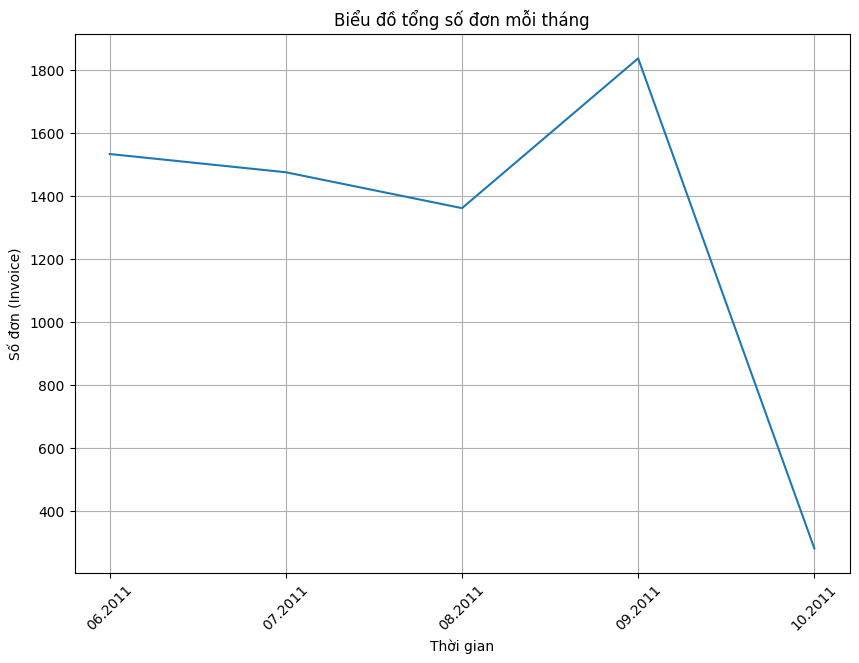

In [9]:
#Biểu đồ tổng số đơn mỗi tháng
ax = pd.DataFrame(monthly_orders_df.values).plot(grid=True,
                                                 figsize=(10,7),
                                                 legend=False) 
ax.set_xlabel('Thời gian')
ax.set_ylabel('Số đơn (Invoice)')
ax.set_title('Biểu đồ tổng số đơn mỗi tháng')
plt.xticks( range(len(monthly_orders_df.index)),
           [x.strftime('%m.%Y') for x in monthly_orders_df.index],
           rotation=45) 
plt.show()

In [10]:
# Tính doanh thu theo tháng
filtered_df['Sales'] = filtered_df['Quantity'] * filtered_df['UnitPrice']
monthly_revenue_df = filtered_df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df


C:\Users\Sầm Thị Mai Chi\AppData\Local\Temp\ipykernel_11944\2981377625.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = filtered_df.set_index('InvoiceDate')['Sales'].resample('M').sum()


InvoiceDate
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     759138.380
2011-09-30    1058590.172
2011-10-31     202415.630
Freq: ME, Name: Sales, dtype: float64

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth
0,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom,22.50,2011-06
1,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom,16.95,2011-06
2,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom,66.40,2011-06
3,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom,32.70,2011-06
4,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom,51.00,2011-06


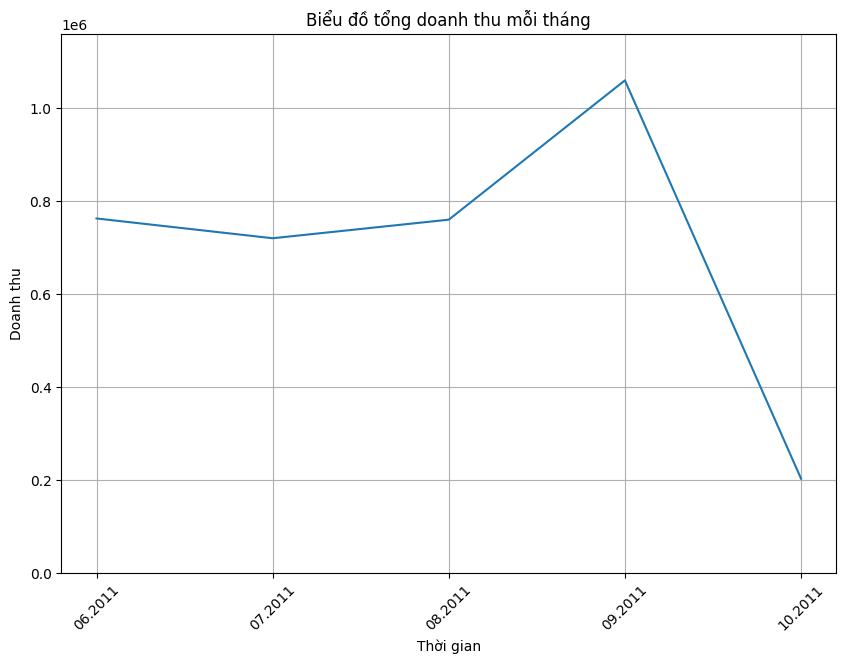

In [12]:
#Vẽ biểu đồ doanh thu theo tháng
ax = pd.DataFrame(monthly_revenue_df.values).plot(grid=True,
                                                  figsize=(10,7),
                                                  legend=False) 
ax.set_xlabel('Thời gian')
ax.set_ylabel('Doanh thu')
ax.set_title('Biểu đồ tổng doanh thu mỗi tháng')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.xticks(range(len(monthly_revenue_df.index)),
           [x.strftime('%m.%Y') for x in monthly_revenue_df.index],
           rotation=45) 
plt.show()

In [13]:
df['Country'].nunique()

30

In [14]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Month'].head()

0    2011-06
1    2011-06
2    2011-06
3    2011-06
4    2011-06
Name: Month, dtype: period[M]

In [15]:
#lấy danh sách các CustomerID theo từng tháng.
customers_by_month = df.groupby('Month')['CustomerID'].unique()

In [16]:
# kiểm tra khách nào quay lại mua hàng từ tháng trước.
retained_customers = []

months = customers_by_month.index  # danh sách các tháng

for i in range(1, len(months)):
    prev_month_customers = set(customers_by_month[months[i-1]])  # tháng trước
    curr_month_customers = set(customers_by_month[months[i]])    # tháng hiện tại

    # giao nhau giữa 2 tháng là khách quay lại
    retained = prev_month_customers & curr_month_customers

    # lưu kết quả
    retained_customers.append({
        'Month': str(months[i]),
        'RetainedCustomers': len(retained)
    })

In [17]:
retention_df = pd.DataFrame(retained_customers)
retention_df.head()

,Month,RetainedCustomers
0,2011-07,365
1,2011-08,388
2,2011-09,425
3,2011-10,94


In [18]:
# tính doanh thu khách hàng quay lại mua hàng
retention_revenue = []

for i in range(1, len(months)):
    prev_month_customers = set(customers_by_month[months[i-1]])
    curr_month_customers = set(customers_by_month[months[i]])
    
    # Khách hàng quay lại
    returning_customers = prev_month_customers & curr_month_customers
    
    # Lọc đơn hàng của tháng hiện tại từ khách quay lại
    curr_month_data = df[df['Month'] == months[i]]
    returning_data = curr_month_data[curr_month_data['CustomerID'].isin(returning_customers)]
    
    # Doanh thu từ khách quay lại
    returning_sales = returning_data['Sales'].sum()
    
    # Tổng doanh thu tháng hiện tại
    total_sales = curr_month_data['Sales'].sum()
    
    # Tỷ lệ doanh thu từ khách quay lại
    ratio = returning_sales / total_sales * 100 if total_sales > 0 else 0

    retention_revenue.append({
        'Month': str(months[i]),
        'ReturningRevenue': returning_sales,
        'TotalRevenue': total_sales,
        'RevenueFromReturning(%)': round(ratio, 2)
    })

In [19]:
revenue_df = pd.DataFrame(retention_revenue)
print(revenue_df)

     Month  ReturningRevenue  TotalRevenue  RevenueFromReturning(%)
0  2011-07         322100.96    719221.191                    44.78
1  2011-08         353658.97    759138.380                    46.59
2  2011-09         526469.93   1058590.172                    49.73
3  2011-10         101359.49    202415.630                    50.07


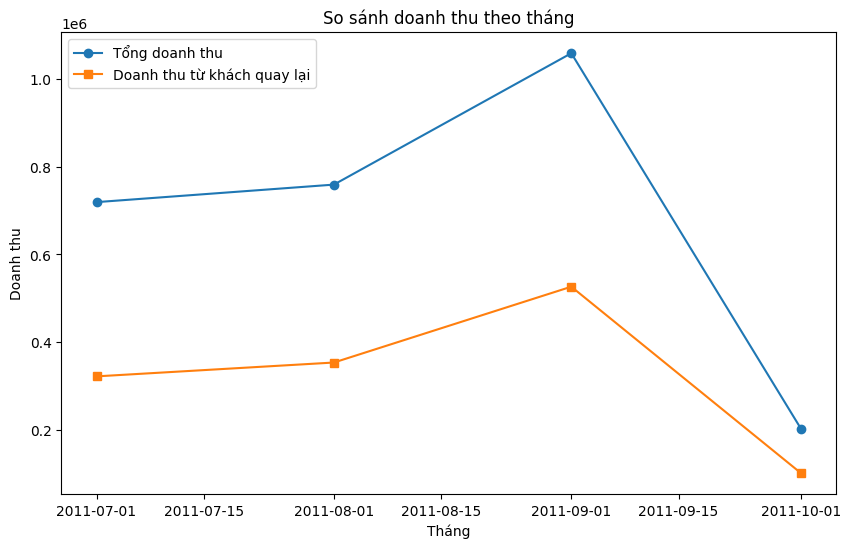

In [20]:
# Convert Month to datetime for better plotting
revenue_df['Month'] = pd.to_datetime(revenue_df['Month'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(revenue_df['Month'], revenue_df['TotalRevenue'], marker='o', label='Tổng doanh thu')
plt.plot(revenue_df['Month'], revenue_df['ReturningRevenue'], marker='s', label='Doanh thu từ khách quay lại')
plt.title('So sánh doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.legend();

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,Month
0,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom,22.50,2011-06,2011-06
1,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom,16.95,2011-06,2011-06
2,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom,66.40,2011-06,2011-06
3,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom,32.70,2011-06,2011-06
4,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom,51.00,2011-06,2011-06


In [22]:
df = filtered_df

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
#USER-BASED
# Bước 1: Tạo ma trận khách hàng - sản phẩm
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Bước 2: Chuẩn hóa dữ liệu 
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(customer_product_matrix)

# Bước 3: Dùng KMeans để phân cụm khách hàng
k = 5  # Số cụm (tuỳ chọn, có thể dùng elbow method để xác định tốt nhất)
kmeans = KMeans(n_clusters=k, random_state=42)
customer_clusters = kmeans.fit_predict(matrix_scaled)

# Gắn nhãn cụm vào DataFrame
customer_product_matrix['Cluster'] = customer_clusters


In [25]:
print(customer_product_matrix.index)

Index([12347.0, 12348.0, 12352.0, 12358.0, 12359.0, 12360.0, 12362.0, 12363.0,
       12364.0, 12372.0,
       ...
       18262.0, 18263.0, 18265.0, 18268.0, 18272.0, 18273.0, 18278.0, 18281.0,
       18282.0, 18283.0],
      dtype='float64', name='CustomerID', length=2555)


In [26]:
# Yêu cầu nhập ID khách hàng
target_customer = float(input("Nhập ID khách hàng: "))

# Kiểm tra xem 'target_customer' có tồn tại trong chỉ số của DataFrame không
if target_customer in customer_product_matrix.index:
    # Xác định cụm mà khách hàng này thuộc về
    target_cluster = customer_product_matrix.loc[target_customer, 'Cluster']

    # Lấy các khách hàng trong cùng cụm (trừ chính họ)
    same_cluster_customers = customer_product_matrix[customer_product_matrix['Cluster'] == target_cluster].drop(target_customer)

    # Tính tổng số lượng từng sản phẩm được mua trong cụm đó
    cluster_product_sums = same_cluster_customers.drop(columns='Cluster').sum().sort_values(ascending=False)

    # Gợi ý các sản phẩm phổ biến nhất mà khách hàng chưa từng mua
    products_bought = set(customer_product_matrix.columns[(customer_product_matrix.loc[target_customer] > 0)])
    recommendations = [p for p in cluster_product_sums.index if p not in products_bought]

    # In top 5 sản phẩm gợi ý
    print("Sản phẩm gợi ý:", recommendations[:5])
else:
    print(f"Khách hàng {target_customer} không có trong DataFrame.")

Sản phẩm gợi ý: ['JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'PACK OF 72 RETROSPOT CAKE CASES', 'WHITE HANGING HEART T-LIGHT HOLDER']


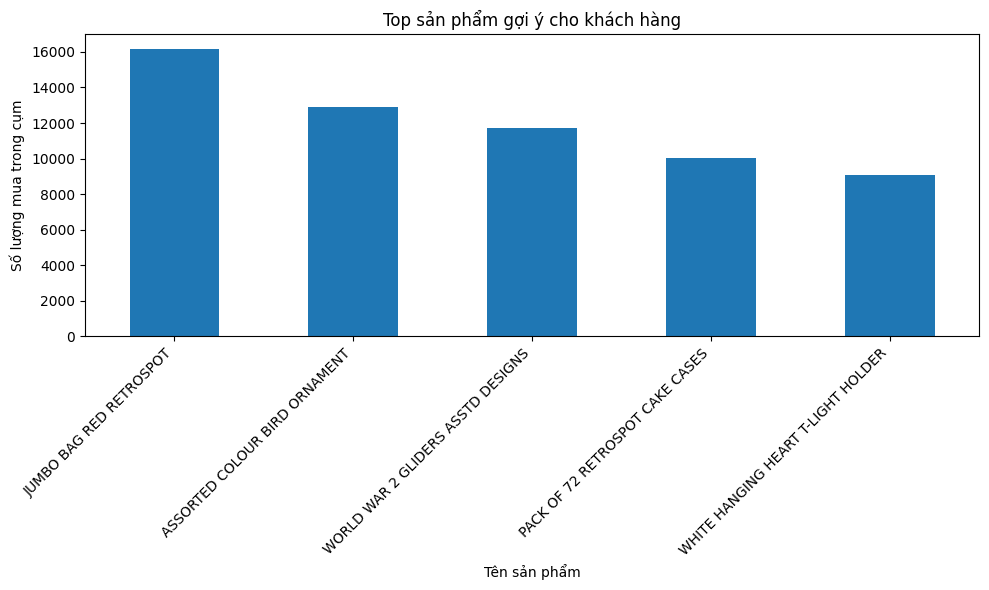

In [27]:
# === TRỰC QUAN HÓA TOP 5 SẢN PHẨM GỢI Ý ===
import matplotlib.pyplot as plt

# Lấy top 5 sản phẩm gợi ý (nếu đủ số lượng)
top_recommendations = cluster_product_sums[recommendations[:5]]

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 6))
top_recommendations.plot(kind='bar')
plt.title('Top sản phẩm gợi ý cho khách hàng')
plt.ylabel('Số lượng mua trong cụm')
plt.xlabel('Tên sản phẩm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Bước 1: Làm Sạch Dữ Liệu
# Lọc dữ liệu cần thiết (ví dụ loại bỏ dòng thiếu CustomerID hoặc InvoiceDate)
df = df.dropna(subset=['CustomerID', 'InvoiceDate'])

# Bước 2: Tạo BasketID
# Tạo BasketID từ CustomerID và InvoiceDate
df['BasketID'] = (
    df['CustomerID'].astype(str) + '_' + df['InvoiceDate'].astype(str)
)

C:\Users\Sầm Thị Mai Chi\AppData\Local\Temp\ipykernel_11944\1140597806.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BasketID'] = (


In [29]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales', 'InvoiceMonth',
       'BasketID'],
      dtype='object')


In [30]:
#APRIORI (Market Basket)
# Tạo cột sale
#df['Sales'] = df['Quantity'] * df['UnitPrice']
# Tạo các giỏ hàng từ những đơn có chung CustomerID và InvoiceDate
df['BasketID'] = (
    df['CustomerID'].astype(str) + '_' + df['InvoiceDate'].astype(str)
)


basket_dict = {}

# Duyệt qua từng BasketID duy nhất
for basket_id in df['BasketID'].unique():
    temp = df[df['BasketID'] == basket_id]
    
    # Tính Quantity theo StockCode
    product_qty = temp.groupby('StockCode')['Quantity'].sum()
    
    # Lọc các sản phẩm có Quantity > 0
    product_qty = product_qty[product_qty > 0]
    
    # Tính BasketSales
    basket_sales = temp['Sales'].sum()
    
    # Tạo 1 dòng dữ liệu gồm các StockCode là cột, giá trị là Quantity
    row = product_qty.to_frame().T  # T (transpose): để thành 1 dòng
    row['BasketSales'] = basket_sales
    
    # Gán vào dict
    basket_dict[basket_id] = row

#Số giỏ hàng có trong dữ liệu
total_baskets = len(basket_dict)
print(f"Tổng số giỏ hàng: {total_baskets}")
#Kết quả: Tổng số giỏ hàng: 5978

C:\Users\Sầm Thị Mai Chi\AppData\Local\Temp\ipykernel_11944\712865205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BasketID'] = (


Tổng số giỏ hàng: 5978


In [31]:
from itertools import combinations
from collections import defaultdict

pair_counts = defaultdict(int)

for basket_id, df in basket_dict.items():
    products = df.drop(columns='BasketSales', errors='ignore').columns
    
    # Ép kiểu tất cả về chuỗi để tránh lỗi khi sort
    products = [str(col) for col in products]

    for pair in combinations(sorted(products), 2):
        pair_counts[pair] += 1

# Chuyển thành DataFrame
pair_df = pd.DataFrame([
    {'ItemA': a, 'ItemB': b, 'Frequency': freq}
    for (a, b), freq in pair_counts.items()
])

#Những cặp hàng hóa tồn tại trong ít nhất 1% số giỏ hàng
min_freq = 0.01 * 9098  # = ~90.98
# Lọc ra các cặp có tần suất lớn hơn hoặc bằng ngưỡng đó
filtered_pairs = pair_df[pair_df['Frequency'] >= min_freq]
# In ra số lượng cặp hàng hóa được lọc
print(len(filtered_pairs))
#Kết quả: có 266 cặp hàng hóa được lọc

266


In [32]:
# Tổng số cặp hàng hóa trong dữ liệu
total_pairs = len(pair_df)
print(total_pairs)
#Tổng số cặp hàng hóa trong dữ liệu: 1132060 

1132060


In [33]:
# Tính toán Support, Confidence, và Lift cho từng cặp sản phẩm
from collections import Counter

# Tổng số giỏ hàng
num_baskets = len(basket_dict)

# Tính số lần mỗi sản phẩm xuất hiện trong các giỏ
item_counter = Counter()

for basket_id, df in basket_dict.items():
    items = df.drop(columns='BasketSales', errors='ignore').columns
    items = [str(i) for i in items]
    for item in items:
        item_counter[item] += 1

# Tính Support, Confidence, Lift
rules = []

for _, row in filtered_pairs.iterrows():
    a, b, freq_ab = row['ItemA'], row['ItemB'], row['Frequency']
    support = freq_ab / num_baskets
    conf_ab = freq_ab / item_counter[a]
    conf_ba = freq_ab / item_counter[b]
    lift_ab = conf_ab / (item_counter[b] / num_baskets)
    lift_ba = conf_ba / (item_counter[a] / num_baskets)

    rules.append({
        'ItemA': a,
        'ItemB': b,
        'Support': round(support, 4),
        'Confidence(A→B)': round(conf_ab, 4),
        'Confidence(B→A)': round(conf_ba, 4),
        'Lift(A→B)': round(lift_ab, 4),
        'Lift(B→A)': round(lift_ba, 4),
        'Frequency': freq_ab
    })
    
    rules_df = pd.DataFrame(rules)
rules_df = rules_df.sort_values(by='Lift(A→B)', ascending=False)
#Lọc các cặp có Lift từ 1 trở lên
rules_df = rules_df[rules_df['Lift(A→B)'] >= 1]
#Suport: Xác suất đồng thời A và B cùng xuất hiện trong một giỏ hàng.
#Confidence: Xác suất Nếu khách đã mua A thì cũng mua B (Và nguowjv lại)
#Lift: Đo mức độ tăng xác suất mua B khi biết đã mua A.



#Lưu bảng Apriori Rules
rules_df.to_excel("Association_Rules.xlsx", index=False)

In [34]:
#KẾT HỢP USED-BASED+APRIORI
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# ====== BƯỚC 1: TÍNH TOÁN USER-BASED CF ======
def get_user_cf_recommendations(customer_id, customer_product_matrix, top_n=3):
    cos_sim = cosine_similarity(customer_product_matrix.fillna(0))
    cos_sim_df = pd.DataFrame(cos_sim, index=customer_product_matrix.index, columns=customer_product_matrix.index)

    if customer_id not in cos_sim_df.columns:
        print(f"Khách hàng {customer_id} không tồn tại.")
        return {}

    similar_users = cos_sim_df[customer_id].drop(customer_id).sort_values(ascending=False).head(top_n)

    user_cf_scores = defaultdict(float)
    for sim_user, sim_score in similar_users.items():
        user_ratings = customer_product_matrix.loc[sim_user]
        for product, rating in user_ratings.items():
            if customer_product_matrix.loc[customer_id].get(product, 0) == 0 and rating > 0:
                user_cf_scores[product] += sim_score * rating

    return dict(sorted(user_cf_scores.items(), key=lambda x: x[1], reverse=True))


# ====== BƯỚC 2: GỢI Ý THEO APRIORI RULES ======
def get_apriori_recommendations(customer_id, customer_product_matrix, rules_df):
    if customer_id not in customer_product_matrix.index:
        print(f"Khách hàng {customer_id} không tồn tại.")
        return {}

    # Các sản phẩm khách hàng đã mua
    customer_products = set(customer_product_matrix.columns[customer_product_matrix.loc[customer_id] > 0])

    apriori_scores = defaultdict(float)
    for _, row in rules_df.iterrows():
        if set([row['ItemA']]).issubset(customer_products):
            for item in set([row['ItemB']]):
                if item not in customer_products:
                    apriori_scores[item] += row['confidence']  # hoặc row['lift']

    return dict(sorted(apriori_scores.items(), key=lambda x: x[1], reverse=True))

# ====== BƯỚC 3: KẾT HỢP 2 NGUỒN GỢI Ý ======
def combine_recommendations(user_cf, apriori_cf, alpha=0.5):
    combined_scores = defaultdict(float)

    for product, score in user_cf.items():
        combined_scores[product] += alpha * score
    for product, score in apriori_cf.items():
        combined_scores[product] += (1 - alpha) * score

    return dict(sorted(combined_scores.items(), key=lambda x: x[1], reverse=True))


# ====== BƯỚC 4: ĐẦU VÀO VÀ KẾT QUẢ ======
def recommend_for_customer(customer_id, customer_product_matrix, rules_df):
    user_cf_recs = get_user_cf_recommendations(customer_id, customer_product_matrix)
    apriori_recs = get_apriori_recommendations(customer_id, customer_product_matrix, rules_df)
    final_recs = combine_recommendations(user_cf_recs, apriori_recs)
    # Đảm bảo hàm trả về một danh sách có thể lặp được
    return list(final_recs.items())

target_customer = float(input("Nhập ID khách hàng: "))
recommend_for_customer(target_customer, customer_product_matrix, rules_df)
print(f"\nTop 5 sản phẩm gợi ý cho khách hàng {target_customer}:")
# Gọi hàm recommend_for_customer với đầy đủ tham số
for i, (product, score) in enumerate(list(recommend_for_customer(target_customer, customer_product_matrix, rules_df))[:5], 1):
    print(f"{i}. {product} - Điểm: {score:.2f}")


Top 5 sản phẩm gợi ý cho khách hàng 12583.0:
1. 12 PENCILS TALL TUBE POSY - Điểm: 15.43
2. JAZZ HEARTS ADDRESS BOOK - Điểm: 14.62
3. DINOSAUR KEYRINGS ASSORTED - Điểm: 11.57
4. PENS ASSORTED FUNKY JEWELED  - Điểm: 11.33
5. JAZZ HEARTS PURSE NOTEBOOK - Điểm: 7.72


Defaulting to user installation because normal site-packages is not writeable


C:\Users\Sầm Thị Mai Chi\AppData\Local\Temp\ipykernel_11944\1569661109.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


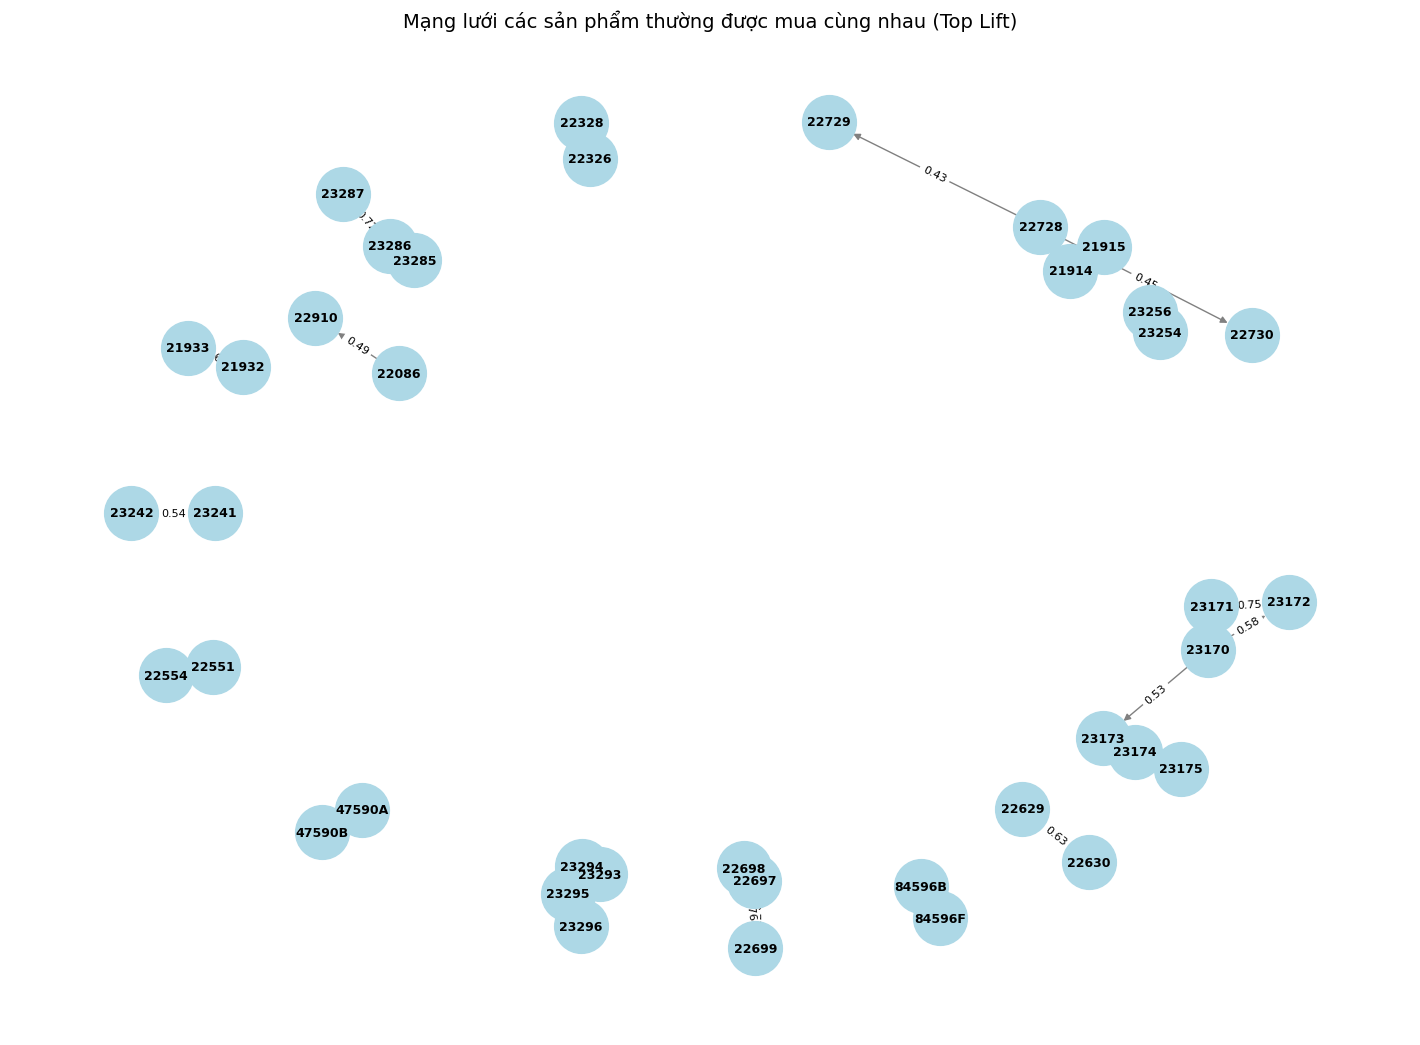

In [35]:
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt

# Lấy top 30 cặp sản phẩm có Lift cao nhất (bạn có thể điều chỉnh số lượng)
top_rules = rules_df.head(30)

# Tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các cạnh (edge) giữa sản phẩm A → B, với trọng số là Lift và nhãn là Confidence
for _, row in top_rules.iterrows():
    G.add_edge(row['ItemA'], row['ItemB'], weight=row['Lift(A→B)'], label=f"{row['Confidence(A→B)']:.2f}")

# Tạo layout
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.7, iterations=100)

# Vẽ các node
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=9, font_weight='bold', edge_color='gray', arrows=True)

# Vẽ nhãn cho cạnh (confidence)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

# Tiêu đề và hiển thị
plt.title("Mạng lưới các sản phẩm thường được mua cùng nhau (Top Lift)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\Sầm Thị Mai Chi\AppData\Local\Temp\ipykernel_11944\2348772673.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


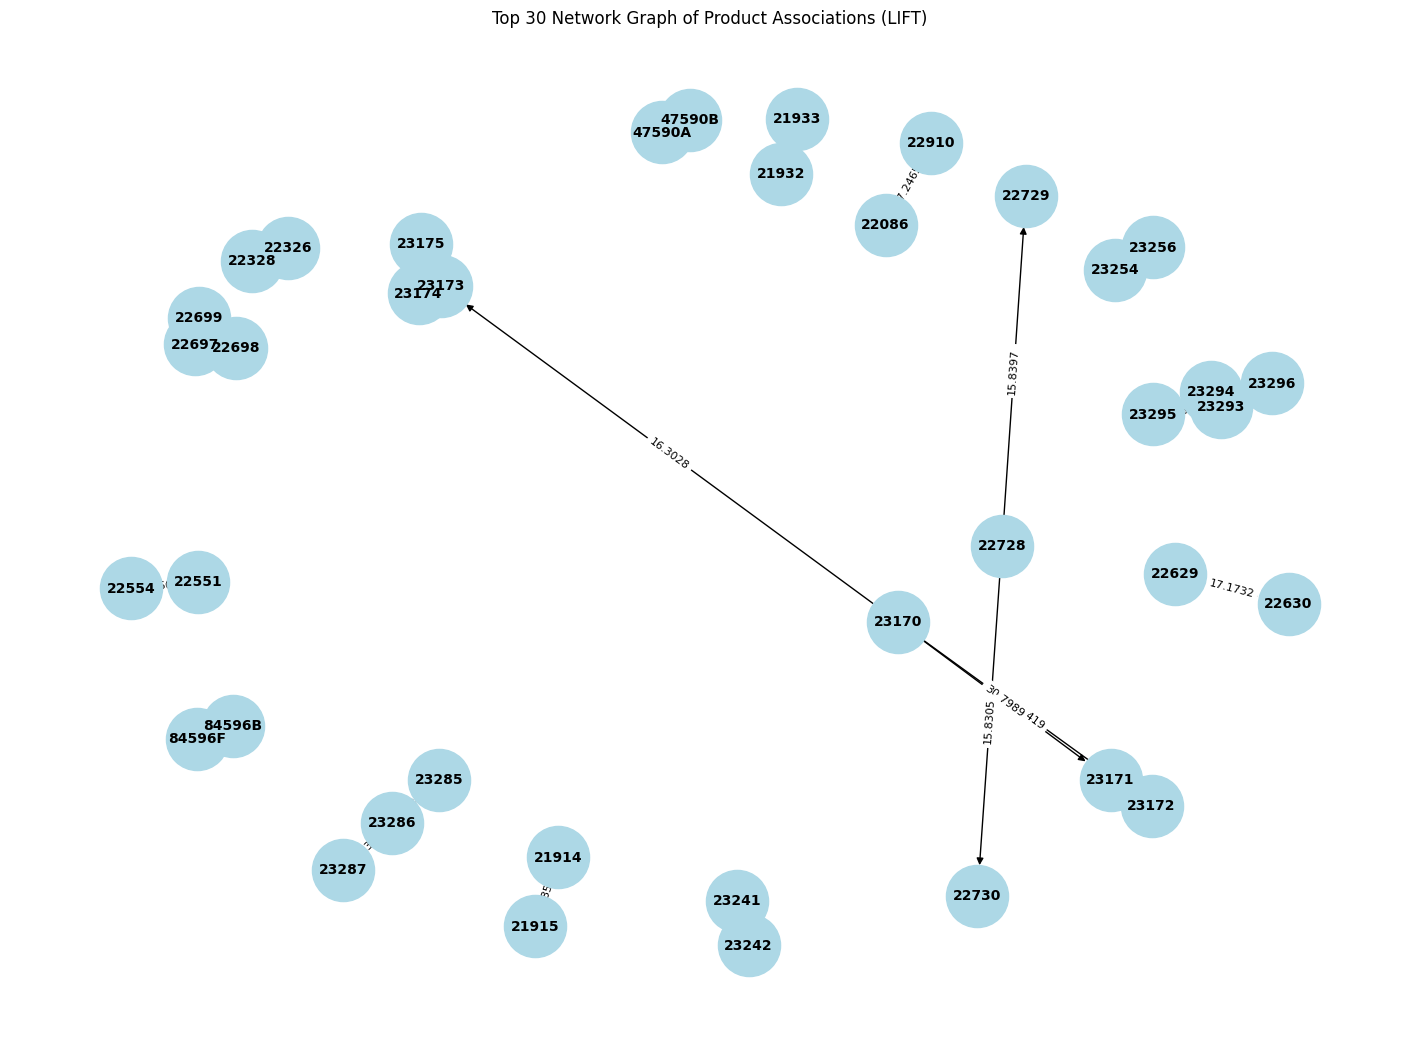

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Lấy top 30 cặp sản phẩm có Lift cao nhất
top_30_rules = rules_df.head(30)

# Tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các cạnh (edge) giữa các sản phẩm A → B, với trọng số là Lift
for _, row in top_30_rules.iterrows():
    G.add_edge(row['ItemA'], row['ItemB'], weight=row['Lift(A→B)'])

# Tạo layout cho đồ thị với khoảng cách rộng hơn giữa các node
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=1.5, iterations=200)  # Tăng k để tạo khoảng cách rộng hơn

# Vẽ đồ thị chỉ với các đường thẳng giữa các node
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', 
        edge_color='black', width=1)

# Thêm nhãn Lift vào các cạnh
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Tiêu đề
plt.title('Top 30 Network Graph of Product Associations (LIFT)')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()